In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']


def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stock_data.to_csv(f'{symbol}_stock_data.csv')


start_date = '2021-01-01'
end_date = '2023-01-01'

for stock in stocks:
    fetch_stock_data(stock, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


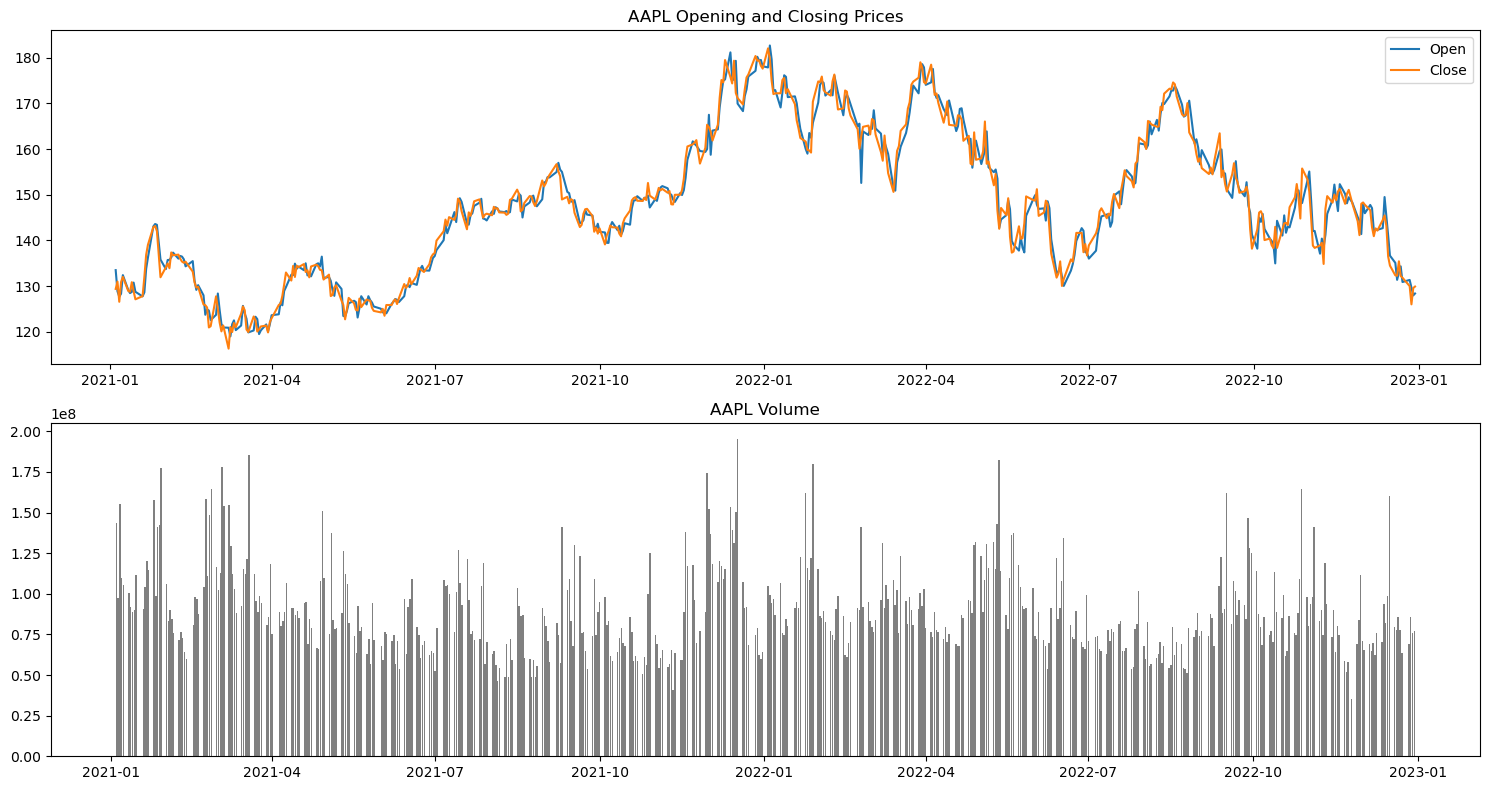

[*********************100%%**********************]  1 of 1 completed


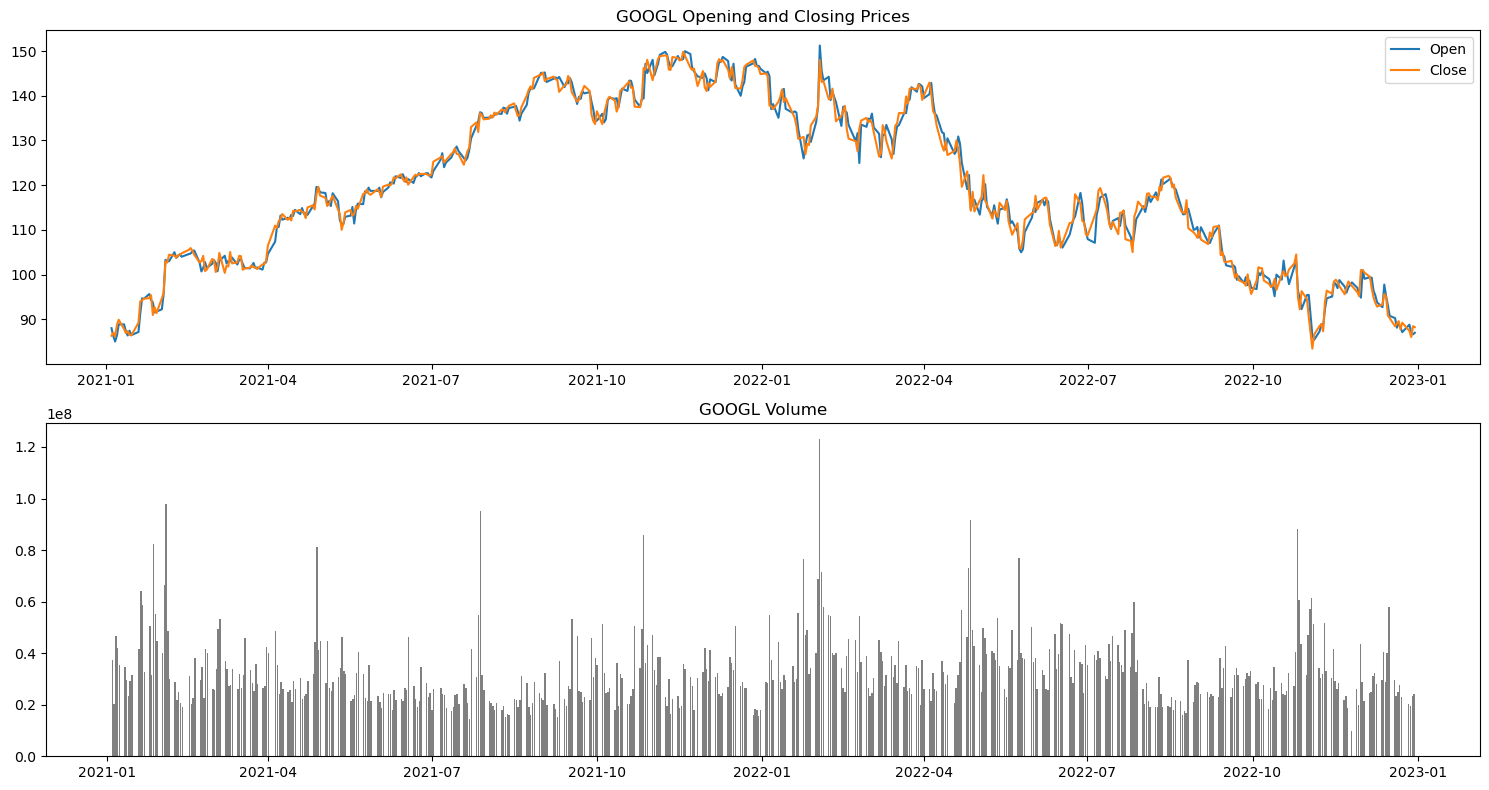

[*********************100%%**********************]  1 of 1 completed


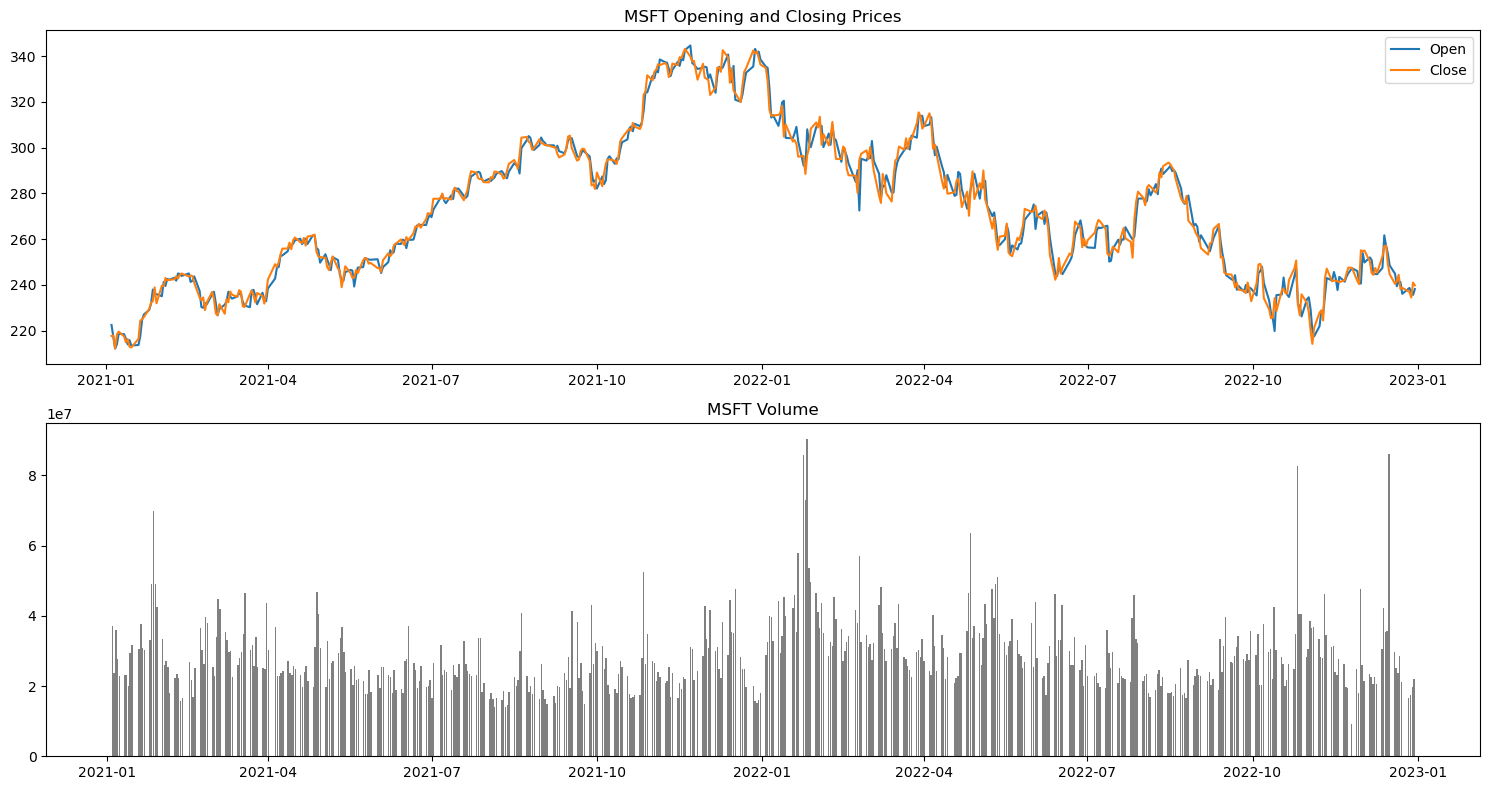

[*********************100%%**********************]  1 of 1 completed


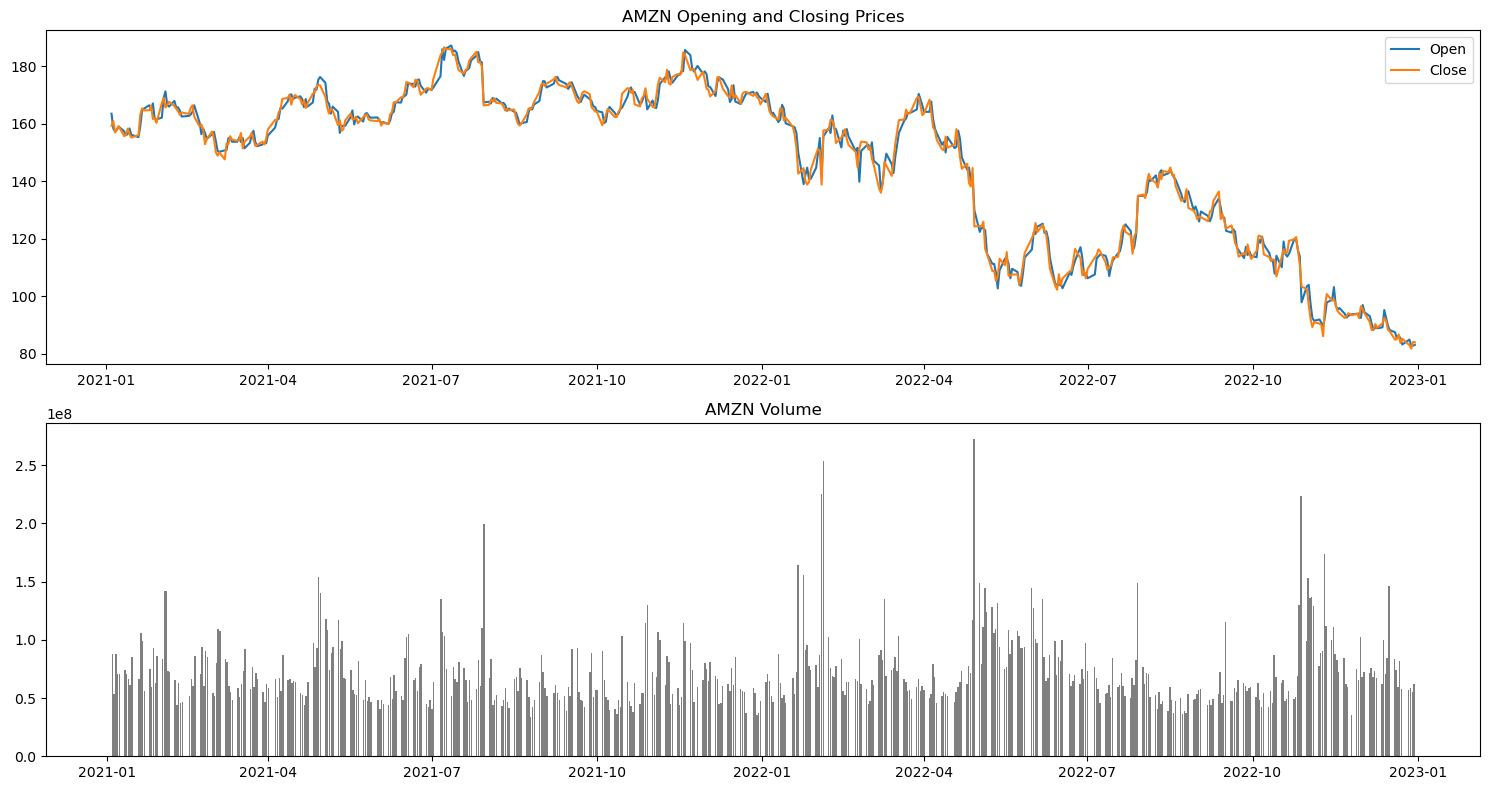

In [35]:
#Opening,Closing and Volume
def plot_prices_and_volume(stock_data, stock_symbol):
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Open'], label='Open')
    plt.plot(stock_data['Close'], label='Close')
    plt.title(f'{stock_symbol} Opening and Closing Prices')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.bar(stock_data.index, stock_data['Volume'], color='gray')
    plt.title(f'{stock_symbol} Volume')
    
    plt.tight_layout()
    plt.show()
    
for stock_symbol in stocks:
    stock_data_2_years = yf.download(stock_symbol, start=start_date, end=end_date)
    
    
    plot_prices_and_volume(stock_data_2_years, stock_symbol)


[*********************100%%**********************]  1 of 1 completed


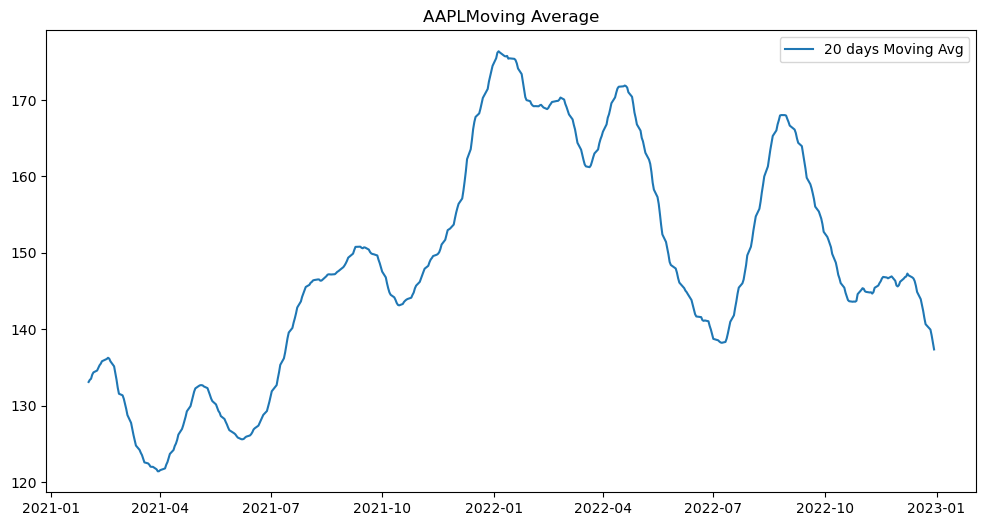

[*********************100%%**********************]  1 of 1 completed


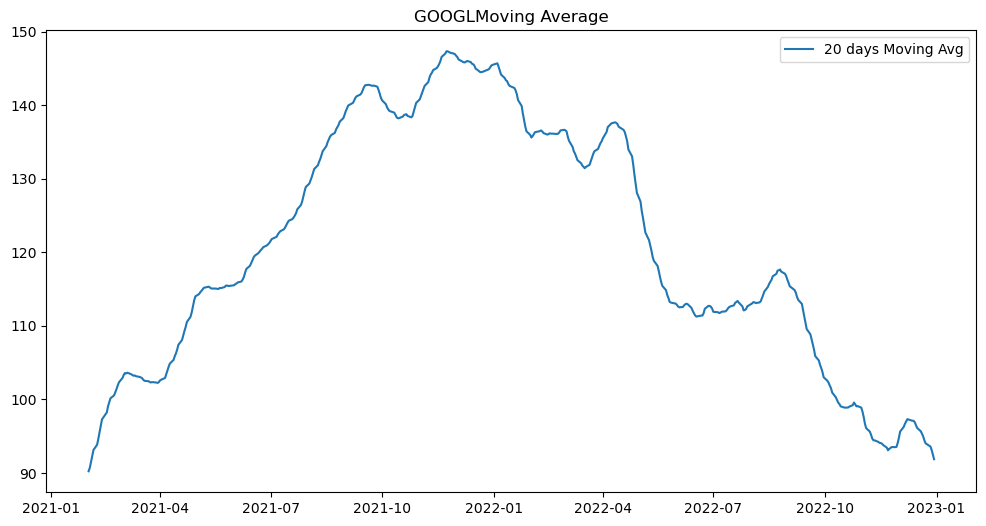

[*********************100%%**********************]  1 of 1 completed


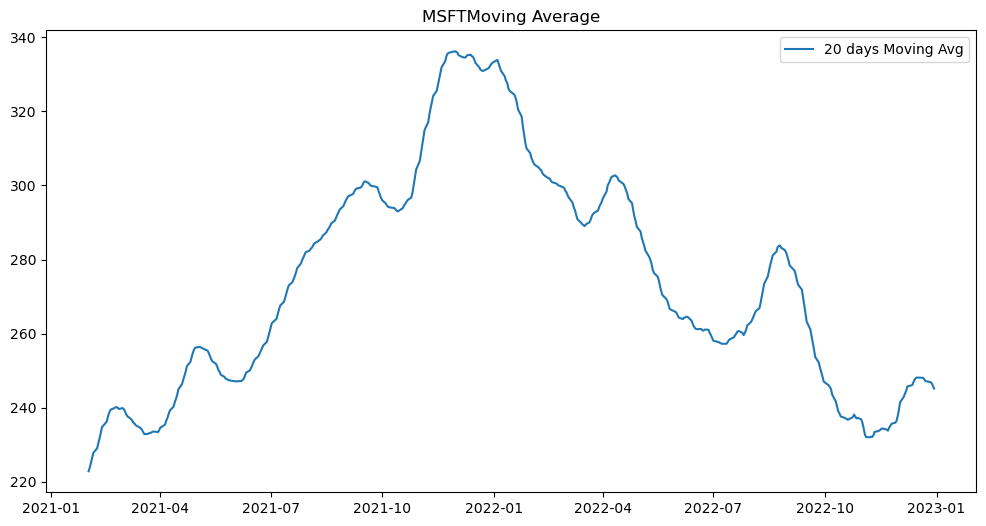

[*********************100%%**********************]  1 of 1 completed


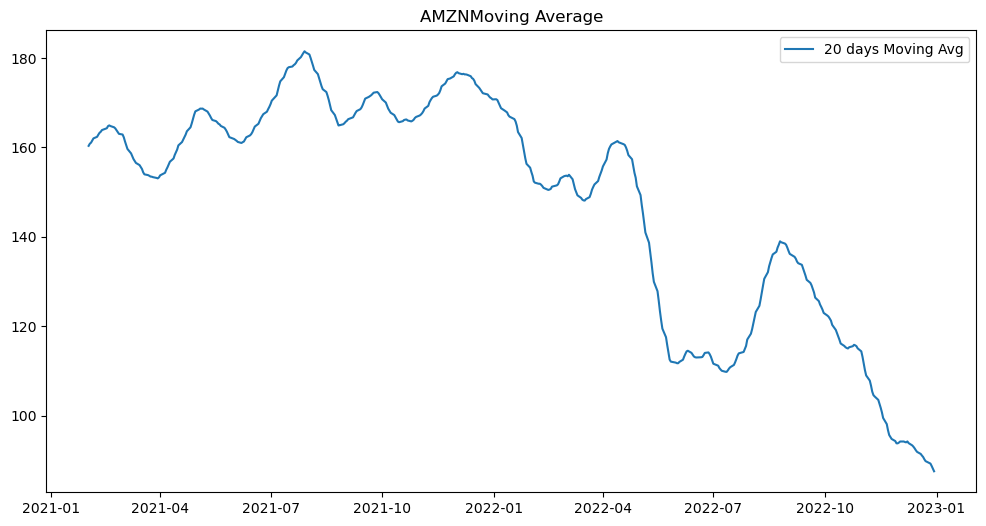

In [44]:
#Moving Average
def plot_moving_average(stock_data, stock_symbol, window=20):
    plt.figure(figsize=(12, 6))

   
   

   
    plt.plot(stock_data['Close'].rolling(window=window).mean(), label=f'{window} days Moving Avg')
    
    plt.title(f'{stock_symbol}Moving Average')
    
    
for stock_symbol in stocks:
    stock_data_2_years = yf.download(stock_symbol, start=start_date, end=end_date)
    
    plot_moving_average(stock_data_2_years, stock_symbol)
    plt.legend()
    plt.show()
    
  

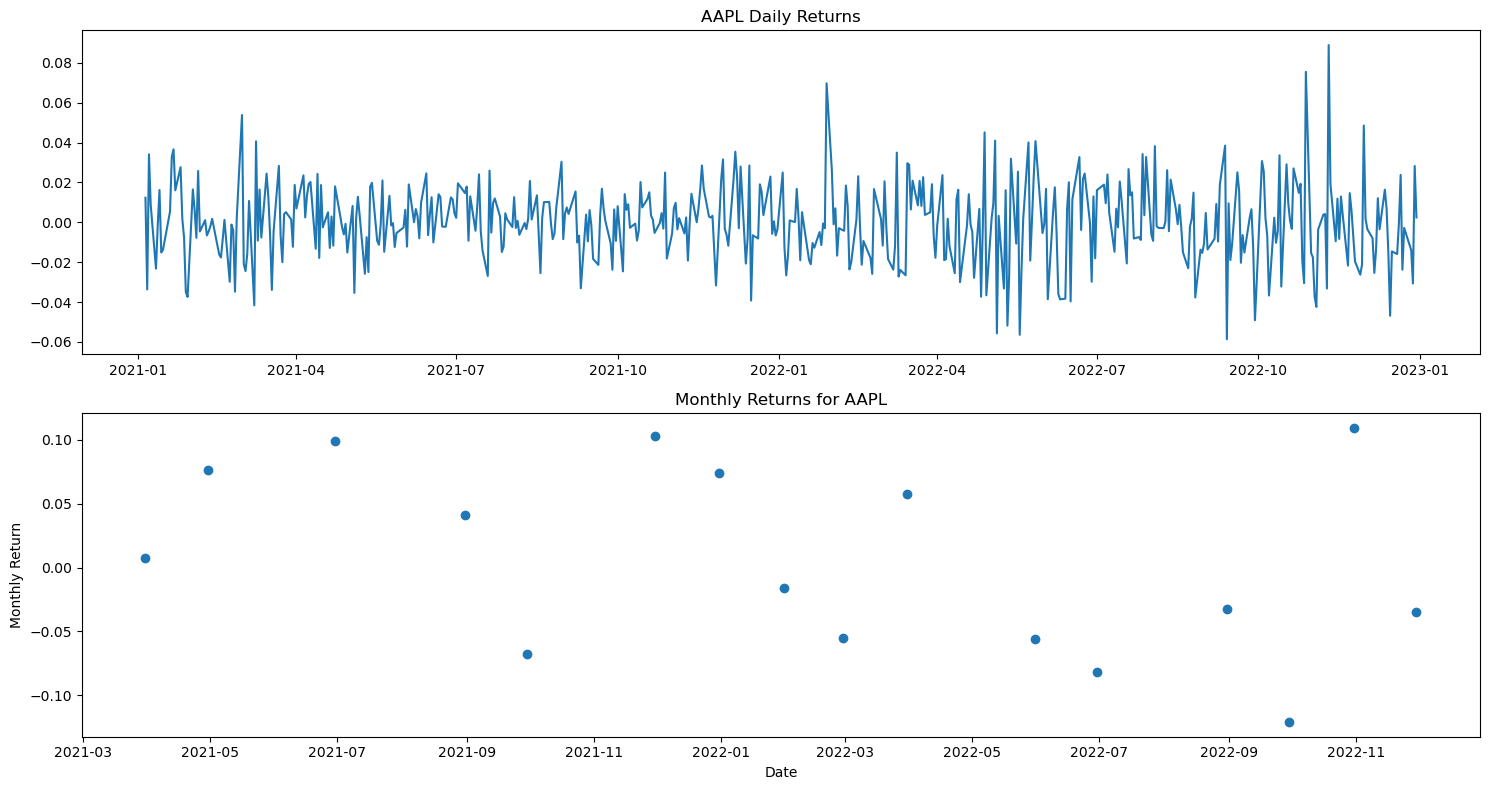

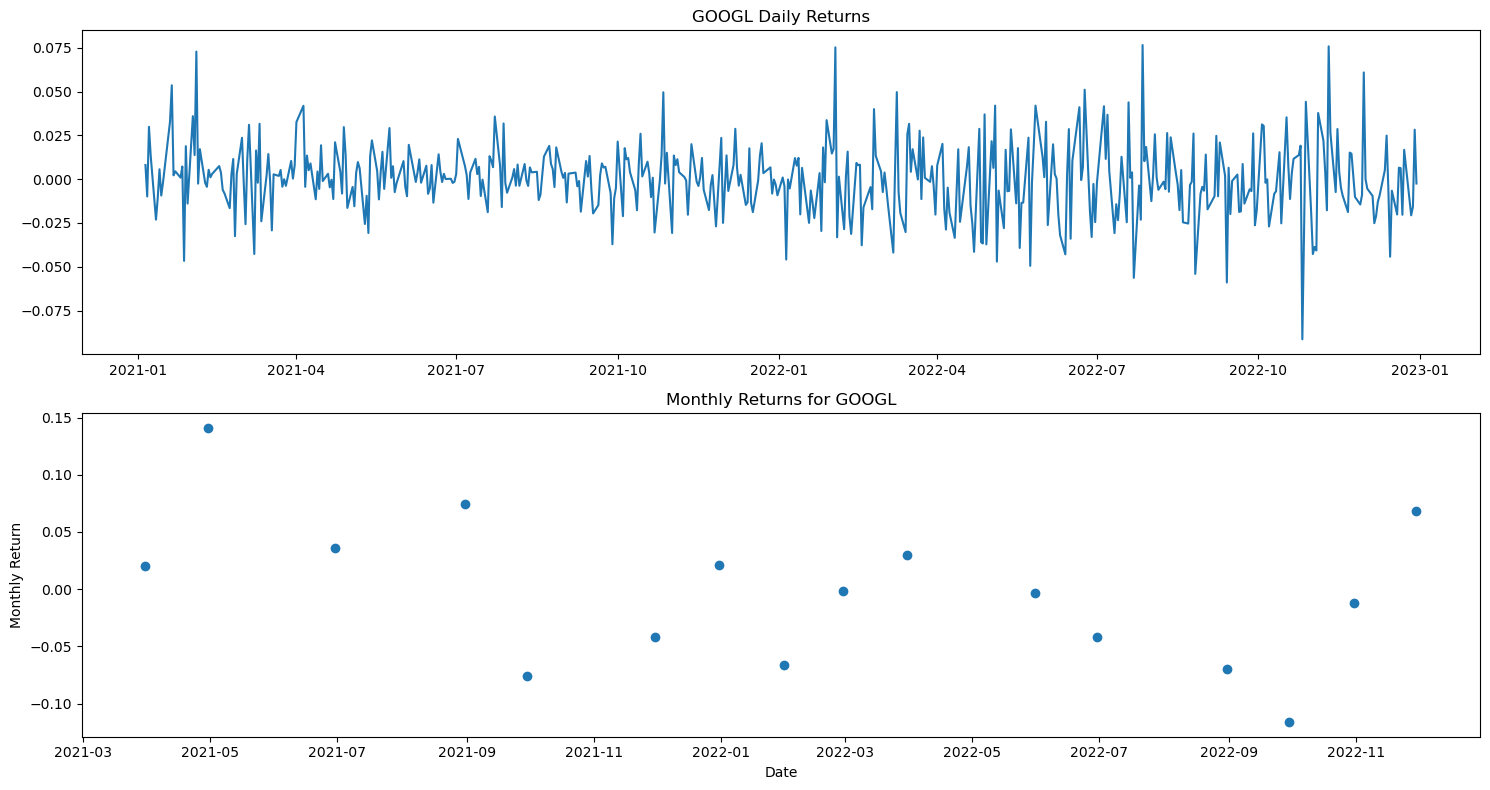

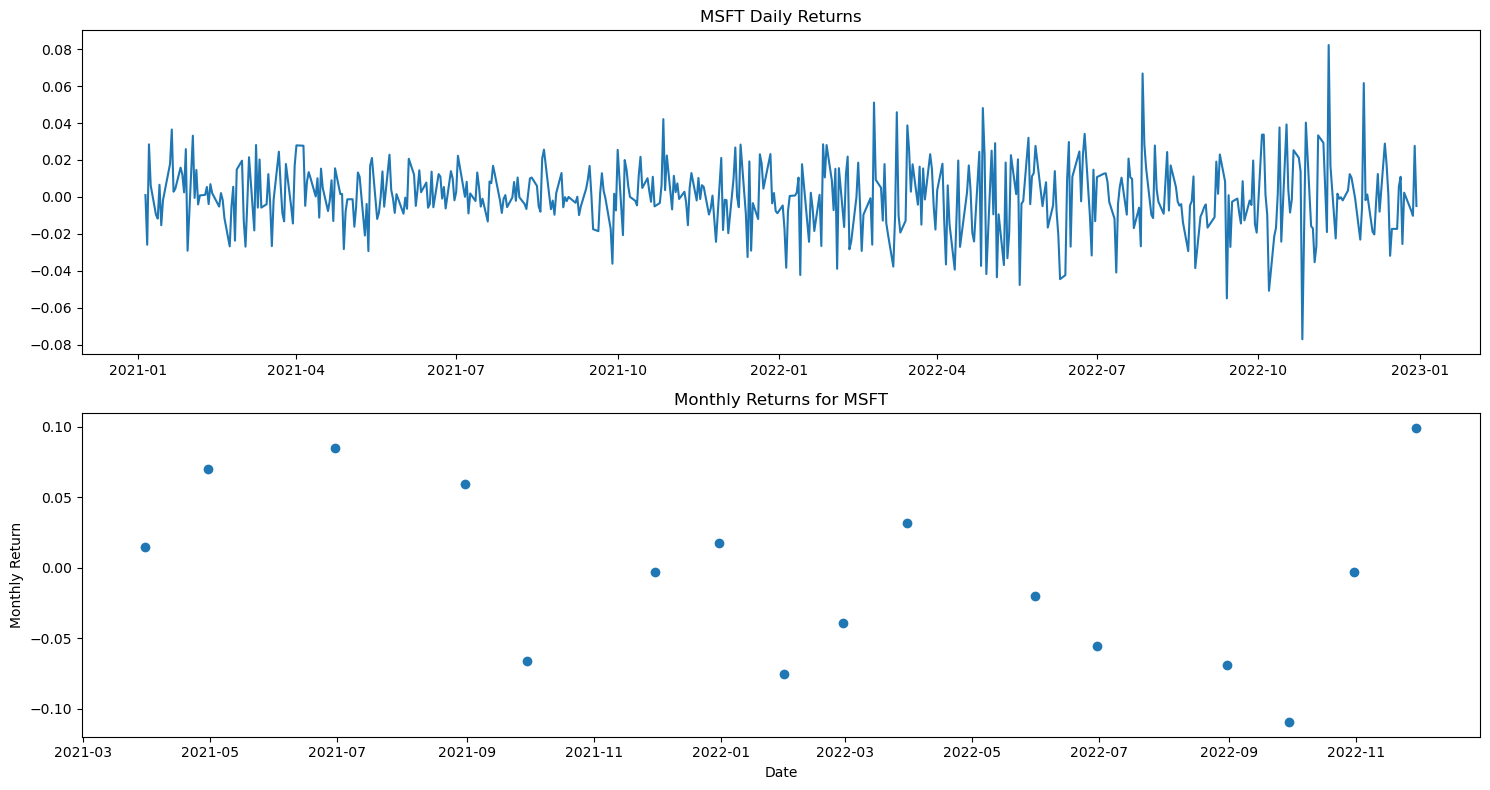

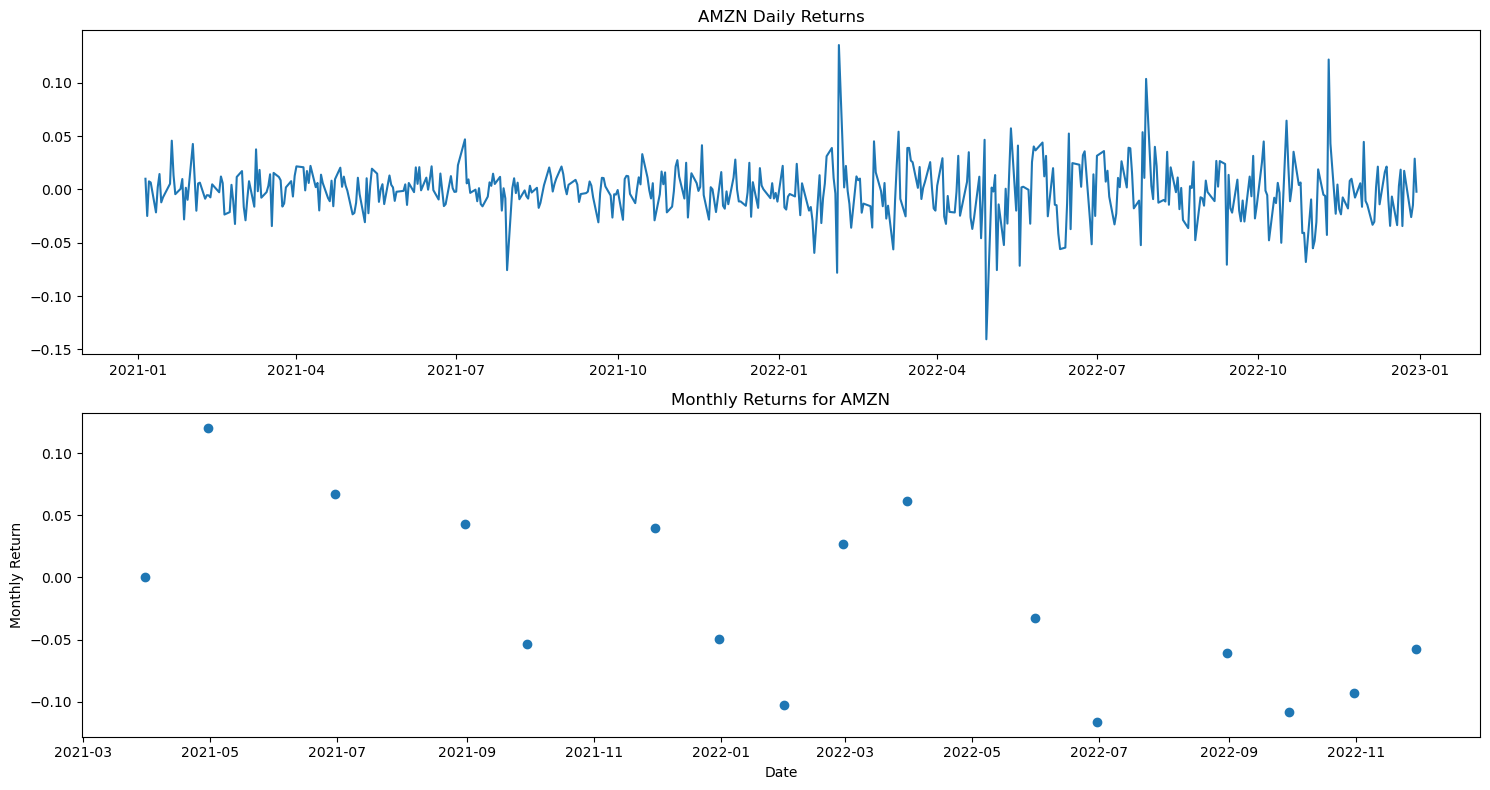

In [54]:
#Returns
def plot_returns(stock_data, stock_symbol):
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 1, 1)
    stock_data['Daily_Return'] = stock_data['Close'].pct_change()
    plt.plot(stock_data['Daily_Return'])
    plt.title(f'{stock_symbol} Daily Returns')

    plt.subplot(2, 1, 2)
    stock_data['Monthly_Return'] = stock_data['Close'].resample('M').ffill().pct_change()
    plt.plot(stock_data.index, stock_data['Monthly_Return'], marker='o', linestyle='-')
    plt.title(f'Monthly Returns for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Return')
    
    plt.tight_layout()
    plt.show()

for stock_symbol in stocks:
    plot_returns(stock_data_2_years[stock_symbol], stock_symbol)




[*********************100%%**********************]  1 of 1 completed


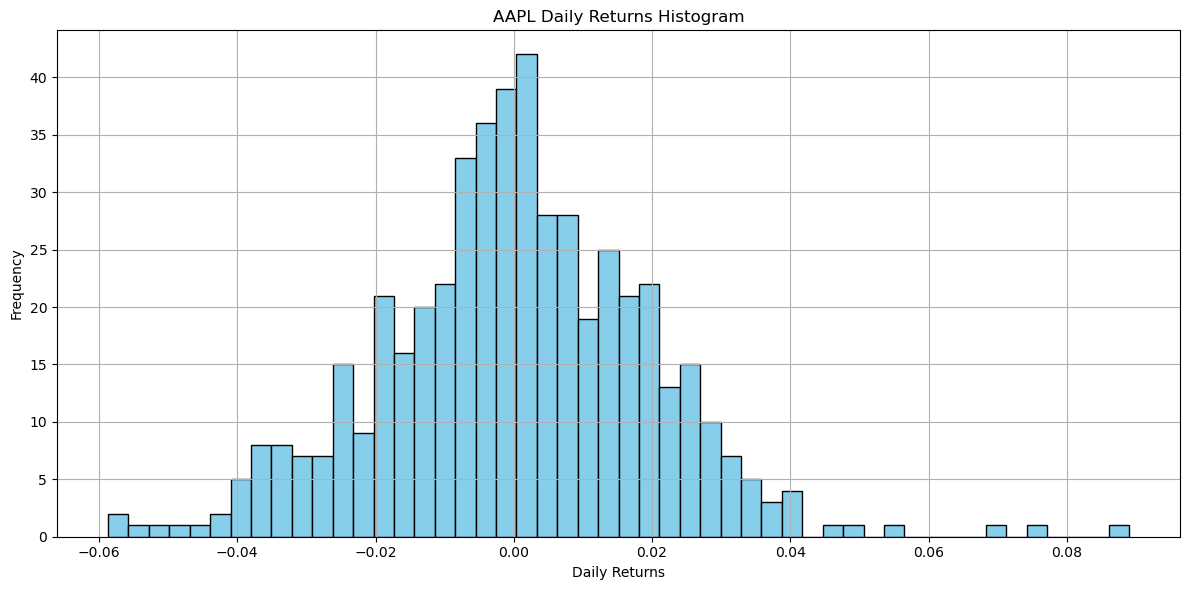

[*********************100%%**********************]  1 of 1 completed


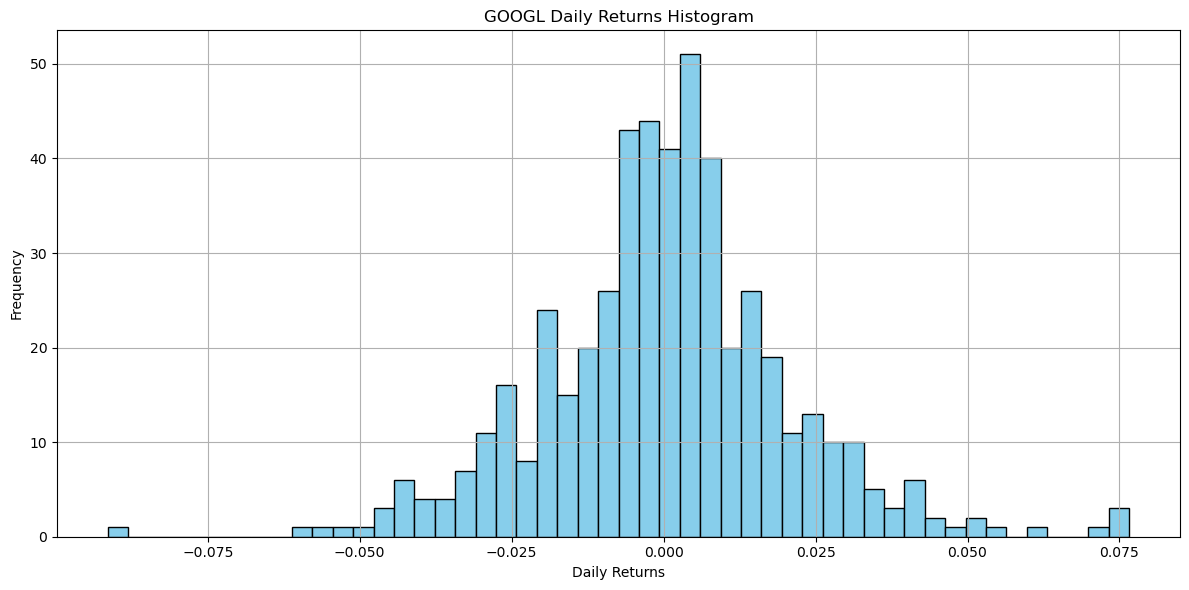

[*********************100%%**********************]  1 of 1 completed


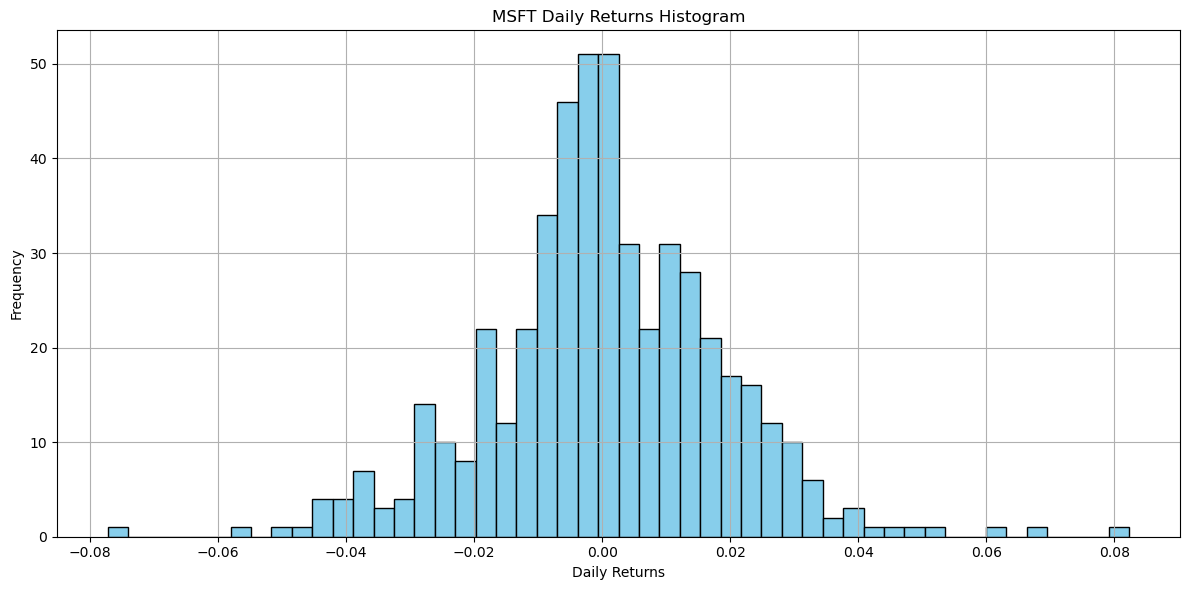

[*********************100%%**********************]  1 of 1 completed


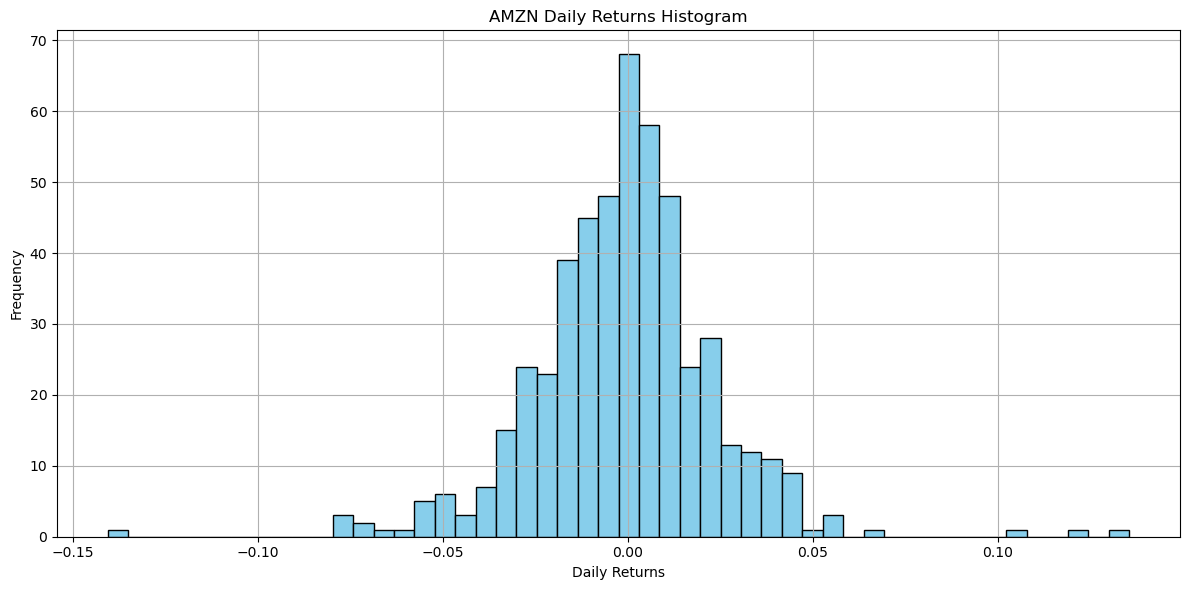

In [5]:
#Daily Returns Histogram

def plot_returns_histogram(stock_data, stock_symbol):
    plt.figure(figsize=(12, 6))
    stock_data['Daily_Return'] = stock_data['Close'].pct_change()
    stock_data['Daily_Return'].hist(bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{stock_symbol} Daily Returns Histogram')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    
for stock_symbol in stocks:
    stock_data_2_years = yf.download(stock_symbol, start=start_date, end=end_date)
    plot_returns_histogram(stock_data_2_years, stock_symbol)
    plt.tight_layout(
    plt.show()
        
        

    
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Correlation between AAPL daily returns and volume: -0.0610
Correlation between GOOGL daily returns and volume: 0.0067
Correlation between MSFT daily returns and volume: -0.0699
Correlation between AMZN daily returns and volume: -0.0723


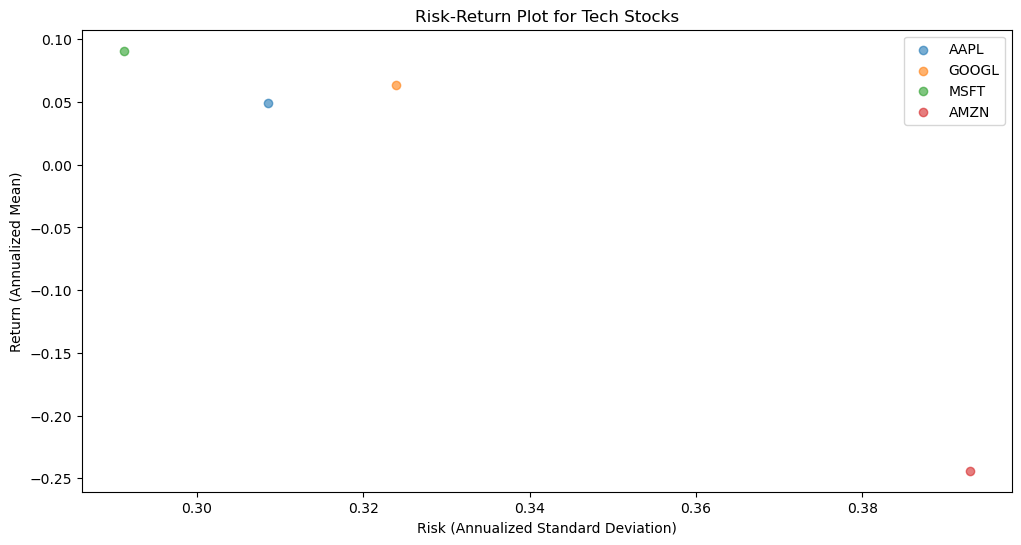

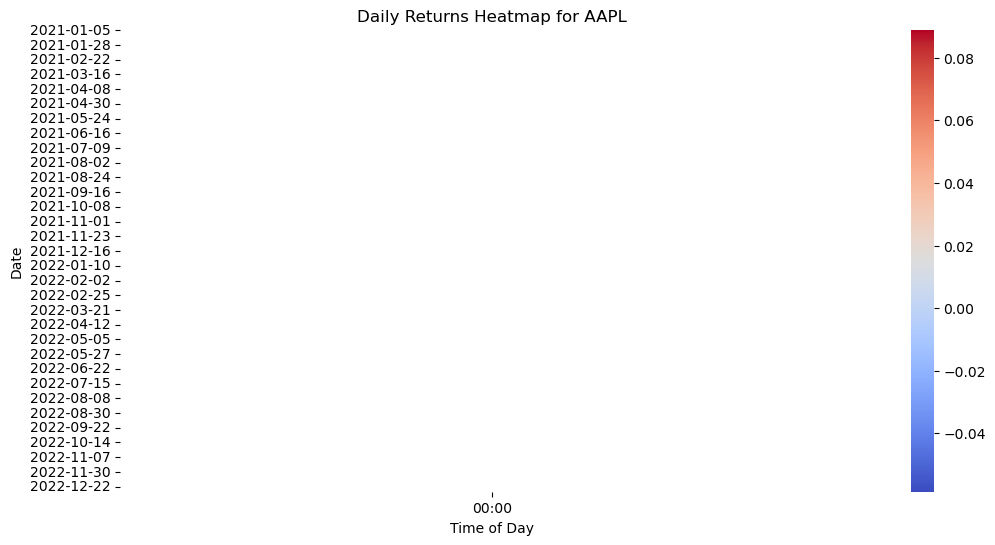

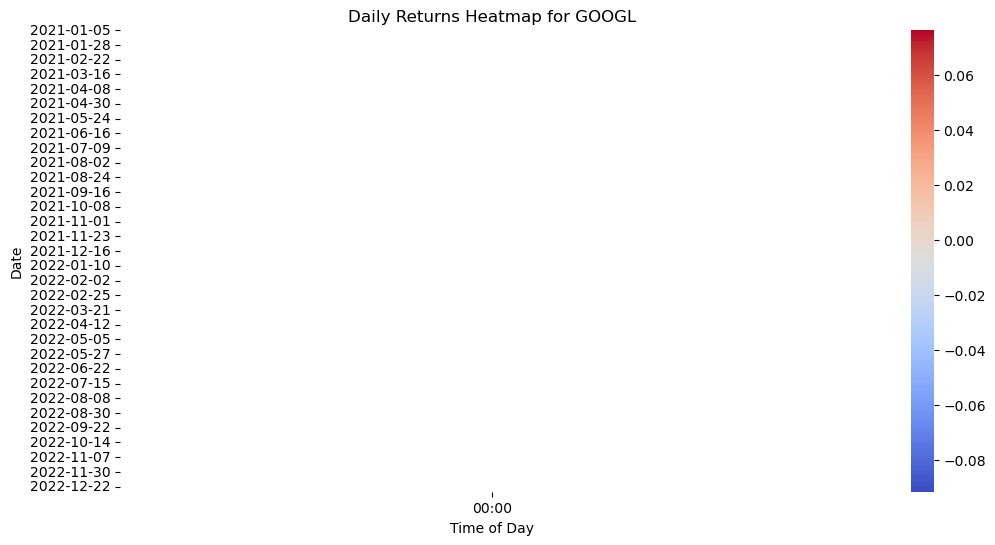

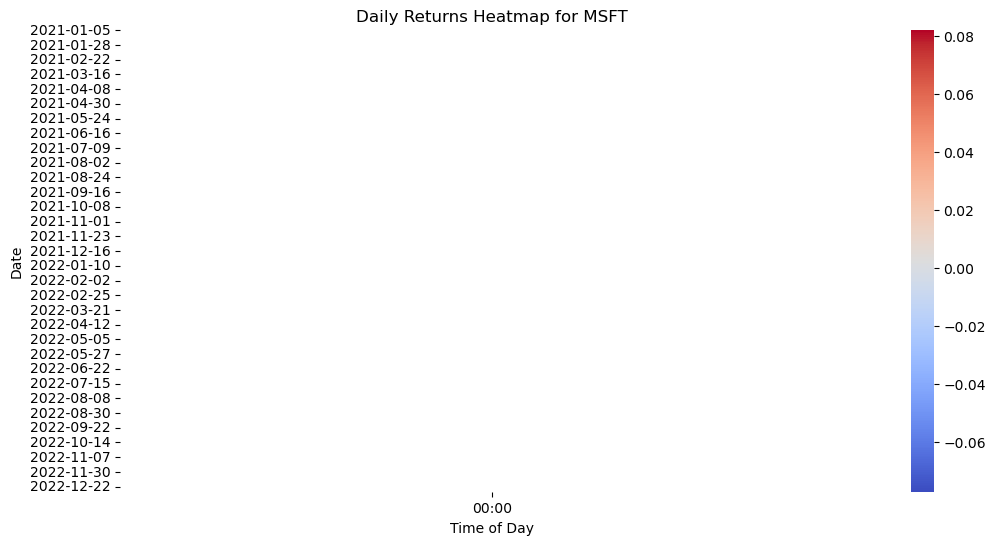

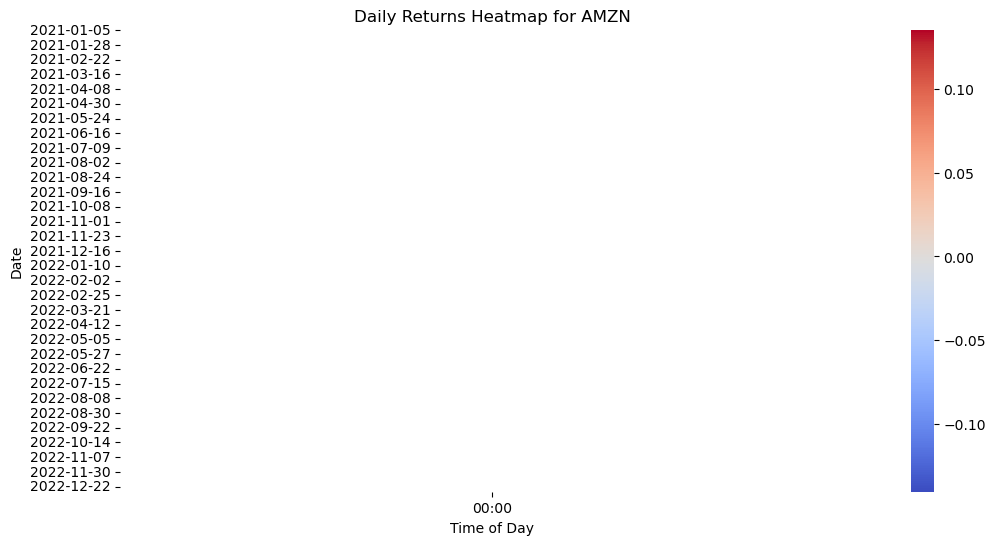

In [11]:
#Correlations Coefficient
for stock in stocks:
    fetch_stock_data(stock, start_date, end_date)


def calculate_returns_and_correlation(stock_data):
    stock_data['Daily_Return'] = stock_data['Close'].pct_change()
    correlation = stock_data['Daily_Return'].corr(stock_data['Volume'])
    return correlation

# Function to plot risk-return plot
def plot_risk_return(ax, stock_data, stock_symbol):
    annualized_return = stock_data['Daily_Return'].mean() * 252
    annualized_risk = stock_data['Daily_Return'].std() * (252 ** 0.5)
    ax.scatter(annualized_risk, annualized_return, alpha=0.6, label=stock_symbol)

fig, ax = plt.subplots(figsize=(12, 6))

stock_data_2_years = {stock: pd.read_csv(f'{stock}_stock_data.csv', index_col='Date', parse_dates=True) for stock in stocks}

for stock_symbol, data in stock_data_2_years.items():
    correlation = calculate_returns_and_correlation(data)
    print(f'Correlation between {stock_symbol} daily returns and volume: {correlation:.4f}')

    plot_risk_return(ax, data, stock_symbol)

ax.legend()
ax.set_title('Risk-Return Plot for Stocks')
ax.set_xlabel('Risk (Annualized Standard Deviation)')
ax.set_ylabel('Return (Annualized Mean)')

plt.show()

    
def plot_returns_heatmap(stock_data, stock_symbol):
    plt.figure(figsize=(12, 6))

    stock_data['Daily_Return'] = stock_data['Close'].pct_change()

    returns_pivot = stock_data.pivot_table(values='Daily_Return', index=stock_data.index.date, columns=stock_data.index.strftime('%H:%M'))

    sns.heatmap(returns_pivot, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Daily Returns Heatmap for {stock_symbol}')
    plt.xlabel('Time of Day')
    plt.ylabel('Date')
    plt.show()

for stock_symbol, data in stock_data_2_years.items():
    plot_returns_heatmap(data, stock_symbol)